In [193]:
%matplotlib inline
from nilearn import datasets
import nibabel as nib
import numpy as np
import pandas as pd

# Load Atlas
subcortical_filename='/home/gerard/Documents/DATA/ATLAS/atlases/HarvardOxford/HarvardOxford-sub-maxprob-thr25-1mm.nii.gz'
cortical_filename='/home/gerard/Documents/DATA/ATLAS/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-1mm.nii.gz'
entorhinal_filename='/home/gerard/Documents/DATA/ATLAS/atlases/Juelich/Juelich-maxprob-thr0-1mm.nii.gz'


# BrainSuite atlas
brainsuite_filename='/home/gerard/Documents/BrainSuite17a/svreg/BCI-DNI_brain_atlas/BCI-DNI_brain.label.nii.gz'

# Load files
nib_cort = nib.load(cortical_filename)
nib_cort_array = np.array(nib_cort.dataobj)

nib_subcort = nib.load(subcortical_filename)
nib_subcort_array = np.array(nib_subcort.dataobj)

nib_entorhinal = nib.load(entorhinal_filename)
nib_entorhinal_array = np.array(nib_entorhinal.dataobj)

nib_brainsuite = nib.load(brainsuite_filename)
nib_brainsuite_array = np.array(nib_brainsuite.dataobj)

# cluster number
c = '3'

# Load probabilities
df_prob = pd.read_csv('results_scores_univ.csv', index_col=0)
print(df_prob)

roi_labels_bs = {
    'LMIDTEMP': [327, 1327, 2327],
    'RMIDTEMP': [326, 1326, 2326],
    'LINFTEMP': [2329, 329, 1329],
    'RINFTEMP': [2328, 328, 1328],
    'LFUSIFORM': [1331,2331, 331],
    'RFUSIFORM': [1330,2330, 330],
    'LHIPPOC': [345, 1345, 2345],
    'RHIPPOC': [344, 1344, 2344],
    'LINFLATVEN': [721],
    'RINFLATVEN': [720],
    'VENTRICLES': [740,760]
}

# Create probability mask on regions
roi_labels_cort = {
    'LMIDTEMP': [10, 11, 12],
    'RMIDTEMP': [10, 11, 12],
    'LINFTEMP': [13, 14, 15],
    'RINFTEMP': [13, 14, 15],
    'LFUSIFORM': [36,37,38,39],
    'RFUSIFORM': [36,37,38,39],
}

roi_labels_subcort = {
    'LHIPPOC': [8],
    'RHIPPOC': [18],
    'LINFLATVEN': [2],
    'RINFLATVEN': [13],
    'VENTRICLES': [2,13]
}

roi_labels_entorhinal = {
    'LENTORHIN': [18],
    'RENTORHIN': [19]
}

mask = np.zeros((nib_brainsuite_array.shape[0],nib_brainsuite_array.shape[1],nib_brainsuite_array.shape[2]))

# Brainsuite
for k, l in roi_labels_bs.iteritems():
    for i in l:
        aux = df_prob.loc[k,c]
        mask[nib_brainsuite_array==i] = aux

'''
# Cortical
for k, l in roi_labels_cort.iteritems():
    for i in l:
        aux = df_prob.loc[k,c]
        mask[nib_cort_array==i+1] = aux

# Subcortical
for k, l in roi_labels_subcort.iteritems():
    for i in l:
        aux = df_prob.loc[k,c]
        mask[nib_subcort_array==i+1] = aux

# Entorhinal
for k, l in roi_labels_subcort.iteritems():
    for i in l:
        aux = df_prob.loc[k,c]
        mask[nib_subcort_array==i+1] = aux
'''

new_image_mri = nib.Nifti1Image(f, nib_img.affine)
new_image_mri2 = nib.Nifti1Image(mask, nib_brainsuite.affine)

# Convert to nifty and save
nib.save(new_image_mri2,'/home/gerard/Documents/test.nii.gz')

                   1         2         3
VENTRICLES  0.074866  0.021534  0.194203
LHIPPOC     0.532579  0.468152  0.446222
RHIPPOC     0.481343  0.172773  0.398915
LINFLATVEN  0.118840  0.198416  0.229547
RINFLATVEN  0.130181  0.183519  0.119520
LMIDTEMP    0.126420  0.173257  0.196838
RMIDTEMP    0.244508  0.142454  0.275316
LINFTEMP    0.184122  0.308937  0.281657
RINFTEMP    0.228562  0.067260  0.179299
LFUSIFORM   0.100467  0.251149  0.142383
RFUSIFORM   0.096160  0.193288  0.132934
LENTORHIN   0.389134  0.531740  0.446671
RENTORHIN   0.339589  0.379488  0.271255


In [194]:
#Preproces cortical map
mask = np.any([nib_cort_array == 11, nib_cort_array == 12, nib_cort_array == 13], axis=(0), keepdims=True)
print(mask.squeeze().shape)
mask[:,104]

(182, 218, 182)


array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]])

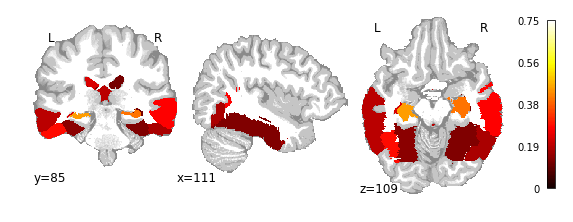

In [195]:
from nilearn import plotting

plotting.plot_stat_map('/home/gerard/Documents/test.nii.gz', bg_img='/home/gerard/Documents/BrainSuite17a/svreg/BCI-DNI_brain_atlas/BCI-DNI_brain.pvc.frac.nii.gz', vmax=0.75, annotate=True, black_bg=False, draw_cross=False, cut_coords=(111,85,109))
plotting.show()

'/home/gerard/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz'

{'labels': ['Background',
  'Frontal Pole',
  'Insular Cortex',
  'Superior Frontal Gyrus',
  'Middle Frontal Gyrus',
  'Inferior Frontal Gyrus, pars triangularis',
  'Inferior Frontal Gyrus, pars opercularis',
  'Precentral Gyrus',
  'Temporal Pole',
  'Superior Temporal Gyrus, anterior division',
  'Superior Temporal Gyrus, posterior division',
  'Middle Temporal Gyrus, anterior division',
  'Middle Temporal Gyrus, posterior division',
  'Middle Temporal Gyrus, temporooccipital part',
  'Inferior Temporal Gyrus, anterior division',
  'Inferior Temporal Gyrus, posterior division',
  'Inferior Temporal Gyrus, temporooccipital part',
  'Postcentral Gyrus',
  'Superior Parietal Lobule',
  'Supramarginal Gyrus, anterior division',
  'Supramarginal Gyrus, posterior division',
  'Angular Gyrus',
  'Lateral Occipital Cortex, superior division',
  'Lateral Occipital Cortex, inferior division',
  'Intracalcarine Cortex',
  'Frontal Medial Cortex',
  'Juxtapositional Lobule Cortex (formerly Sup